# Comparison between gas-powered and fully electric Ford F-150s

The Ford F-150 is the best selling vehicle in the USA. With the new electric F-150 Lightning and hybrid F-150 joining the lineup of gas-powered trucks, we can perform an apples to apples comparison of the fuel costs of driving gas-powered and electric vehicles. 

For now, electric vehicles are more expensive up front than the more common gas-powered vehicles, but they are less expensive to drive due to the lower fuel costs. As such, for a given vehicle and amount of driving, the money savings from driving an electric vehicle could offset the initial cost difference, making the electric vehicle overall more economical to own. 

__For the Ford F-150 and typical driving amounts, how long would it take for the F-150 lightning to cost less than the equivalent Gas-powered F-150?__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown as md

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Load data

In [3]:
# Get vehicles database from Fueleconomy.gov
url_cars = 'https://www.fueleconomy.gov/feg/epadata/vehicles.csv'
cars = pd.read_csv(url_cars, low_memory=False)

In [4]:
# Get monthly residential electricity data from US Energy Information Administration
elec_url = 'https://www.eia.gov/electricity/data/eia861m/xls/sales_revenue.xlsx'
us_elec = pd.read_excel(elec_url, sheet_name='US-YTD', usecols='A:C, G', 
                            skiprows=2, skipfooter=1)

# Price in Cents/kWh
us_elec = us_elec.rename(columns={'Cents/kWh': 'price'})

# Remove yearly average
us_elec = us_elec[us_elec['MONTH'] != '.']

# Change date information into Datetime
us_elec['day'] = '1'
us_elec['period'] = pd.to_datetime(us_elec[['Year', 'MONTH', 'day']])
us_elec = us_elec.drop(['Year', 'MONTH', 'day'], axis=1)

us_elec.sort_values(by='period', inplace=True)

In [5]:
# Get weekly gas prices from US Energy Information Administration
url_gas = 'https://www.eia.gov/petroleum/gasdiesel/xls/pswrgvwall.xls'
gas_prices = pd.read_excel(url_gas, sheet_name='Data 1', skiprows=2, parse_dates=['Date'])

# Rename columns
columns = gas_prices.columns.values.tolist()

sub1 = 'Weekly '
sub2 = ' Regular'

new_column = []
for name in columns:
    if sub1 in name:

        # get index of substrings
        idx1 = name.index(sub1)
        idx2 = name.index(sub2)

        new_name = name[idx1 + len(sub1): idx2]
        new_column += [new_name]
        
    else:
        new_column += [name]

column_dict = dict(zip(columns, new_column))

gas_prices = gas_prices.rename(columns=column_dict)

## Select cars to compare

In [6]:
# Get unique years and makes from the cars database
years = sorted(cars['year'].unique())
makes = cars['make'].str.lower().unique()

In [7]:
columns = ['id', 'model', 'fuelType', 'drive', 'cylinders', 'displ', 'trany', 'city08', 'highway08', 
                     'evMotor', 'rangeCity', 'rangeHwy']

In [8]:
cars[(cars['year'] == 2022) & (cars['make'] == 'Ford') & (cars['model'].str.contains('150'))][columns]

,id,model,fuelType,drive,cylinders,displ,trany,city08,highway08,evMotor,rangeCity,rangeHwy
38307,44865,F150 Pickup 2WD,Regular,Rear-Wheel Drive,6.0,2.7,Automatic (S10),20,26,NaN,0.0,0.0
38308,44866,F150 Pickup 2WD FFV,Gasoline or E85,Rear-Wheel Drive,6.0,3.3,Automatic (S10),19,24,NaN,0.0,0.0
38309,44867,F150 Pickup 2WD,Regular,Rear-Wheel Drive,6.0,3.5,Automatic (S10),18,24,NaN,0.0,0.0
38310,44868,F150 Pickup 2WD FFV,Gasoline or E85,Rear-Wheel Drive,8.0,5.0,Automatic (S10),17,24,NaN,0.0,0.0
38311,44869,F150 Pickup 2WD,Regular,Rear-Wheel Drive,6.0,3.5,Automatic (S10),17,24,NaN,0.0,0.0
38313,44870,F150 Pickup 2WD FFV,Gasoline or E85,Rear-Wheel Drive,8.0,5.0,Automatic (S10),17,24,NaN,0.0,0.0
38314,44871,F150 Pickup 4WD,Regular,Part-time 4-Wheel Drive,6.0,2.7,Automatic (S10),19,24,NaN,0.0,0.0
38315,44872,F150 Pickup 4WD FFV,Gasoline or E85,Part-time 4-Wheel Drive,6.0,3.3,Automatic (S10),19,22,NaN,0.0,0.0
38316,44873,F150 Pickup 4WD,Regular,Part-time 4-Wheel Drive,6.0,3.5,Automatic (S10),18,23,NaN,0.0,0.0
38317,44874,F150 Pickup 4WD FFV,Gasoline or E85,Part-time 4-Wheel Drive,8.0,5.0,Automatic (S10),16,22,NaN,0.0,0.0


In [9]:
# Select cars from the cars database using their ID values

# Gas
car1_id = 44873
# Hybrid
car2_id = 44940
# Electric
car3_id = 45318

# Individual vehicle data
car1 = cars[cars['id'] == car1_id].iloc[0]
car2 = cars[cars['id'] == car2_id].iloc[0]
car3 = cars[cars['id'] == car3_id].iloc[0]

# Get vehicle names
car1_name = str(car1['year']) + ' ' + car1['make'] + ' ' + car1['model']
car2_name = str(car2['year']) + ' ' + car2['make'] + ' ' + car2['model']
car3_name = str(car3['year']) + ' ' + car3['make'] + ' ' + car3['model']

print(f'car1: {car1_name}')
print(f'car2: {car2_name}')
print(f'car3: {car3_name}')

car1: 2022 Ford F150 Pickup 4WD
car2: 2022 Ford F150 Pickup 4WD HEV
car3: 2022 Ford F-150 Lightning 4WD


In [386]:
selected_cars_df = cars[(cars['id'] == car1_id) | (cars['id'] == car2_id) | (cars['id'] == car3_id)]

### Ford F-150 prices from Ford website on August 26, 2022
F-150 Lightning standard range, XLT (38808) MSRP: $61769

F-150 XLT, 4x4 3.5 L ICE (38316) MSRP: $57645

F-150 XLT, 4x4, Hybrid (38391) MSRP: $59405

In [10]:
# Dataframe of F-150 prices
msrp = pd.DataFrame({'price':[61769, 57645, 59405]},
                    index=['F-150 Lightning', 'F-150', 'F-150 Hybrid'])

In [11]:
# Separate different vehicle types for plotting
ev = cars[cars['fuelType1'] == 'Electricity']
ice = cars[(cars['fuelType1'] != 'Electricity') & (cars['fuelType2'] != 'Electricity') & \
           (cars['atvType'] != 'Hybrid')]
phev = cars[cars['atvType'] == 'Plug-in Hybrid']
hybrids = cars[cars['atvType'] == 'Hybrid']

### How do these trucks compare to other vehicles?

Comparison of the selected Ford F-150s with all vehicles in the database

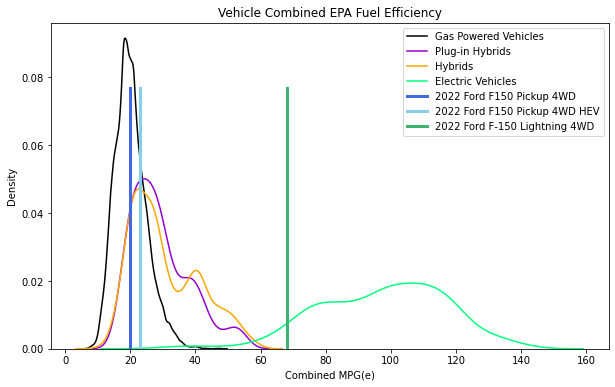

In [237]:
# Plot to compare EPA estimated fuel efficiency of selected cars with entire cars database
plt.subplots(figsize=(10, 6))
sns.kdeplot(x='comb08', data=ice, color='k')
sns.kdeplot(x='comb08', data=phev, color='darkviolet')
sns.kdeplot(x='comb08', data=hybrids, color='orange')
sns.kdeplot(x='comb08', data=ev, color='springgreen')
plt.axvline(car1['comb08'], 0, 0.8, c='royalblue', linewidth=3)
plt.axvline(car2['comb08'], 0, 0.8, c='skyblue', linewidth=3)
plt.axvline(car3['comb08'], 0, 0.8, c='mediumseagreen', linewidth=3)
plt.legend(['Gas Powered Vehicles', 'Plug-in Hybrids', 'Hybrids', 'Electric Vehicles',
            car1_name, car2_name, car3_name], loc='upper right')
plt.title('Vehicle Combined EPA Fuel Efficiency')
plt.xlabel('Combined MPG(e)');

The gas an hybrid F-150s have pretty average fuel efficiencies compared with the cars in the database. The F-150 Lightning has better fuel efficiency than the gas and hybrid F-150s, but is on the lower end of fuel efficiencies for electric vehicles as a whole. This is to be expected as the Lightning is one of the largest fully electric vehicle in the database.

### How do these trucks compare to all Ford F-150s?
How has the fuel effeciency of Ford F-150s changed over time and where do the selected trucks compare?

In [263]:
# Get all F-150s from cars database
f150_all = cars[(cars['make'] == 'Ford') & (cars['model'].str.contains('F150'))]

lightning_all = cars[(cars['make'] == 'Ford') & (cars['model'].str.contains('Lightning')) 
                    & (cars['year'] > 2021)]

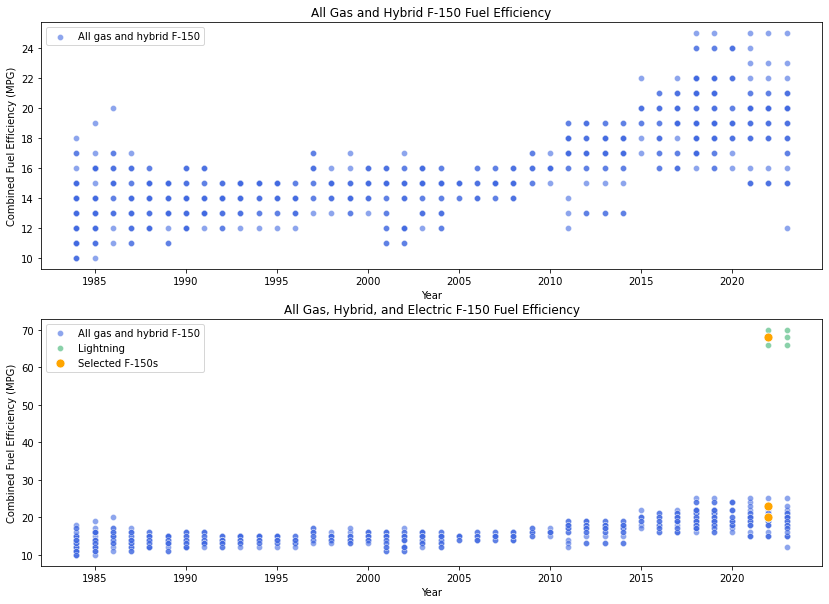

In [493]:
# Scatterplots of fuel efficiency over time for all Ford F-150s
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,10))#, sharex=True)
sns.scatterplot(x='year', y='comb08', data=f150_all, color='royalblue', 
                alpha=0.6, ax=ax1, label='All gas and hybrid F-150')
ax1.set_ylabel('Combined Fuel Efficiency (MPG)')
ax1.set_xlabel('Year')
ax1.set_title('All Gas and Hybrid F-150 Fuel Efficiency')
sns.scatterplot(x='year', y='comb08', data=f150_all, color='royalblue', 
                alpha=0.6, ax=ax2, label='All gas and hybrid F-150')
sns.scatterplot(x='year', y='comb08', data=lightning_all, color='mediumseagreen', 
                alpha=0.6, ax=ax2, label='Lightning')
sns.scatterplot(x='year', y='comb08', data=selected_cars_df, color='orange', 
                s=80, ax=ax2, label='Selected F-150s')
ax2.set_ylabel('Combined Fuel Efficiency (MPG)')
ax2.set_xlabel('Year')
ax2.set_title('All Gas, Hybrid, and Electric F-150 Fuel Efficiency');

Overall, the fuel efficiency of Ford F-150s have improved over time. There is a little more variation in the fuel efficiencies in recent years for gas powered trucks, probably due to the addition of the hybrid model and the less fuel efficient high performance, Raptor model. The selected F-150 in this study are shown in orange and are some of the most fuel efficient Ford F-150s ever.

## Fuel price estimates

The mean and standard deviation of the last three years of US gas and residential electricity prices are used as an estimate of the average fuel prices in this study. 

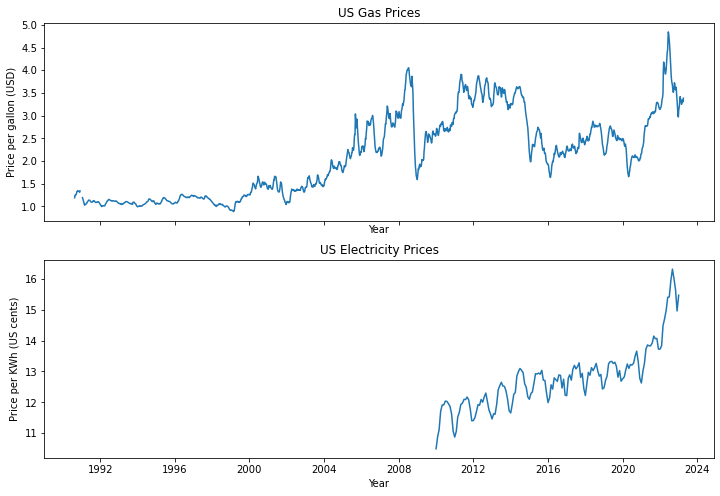

In [366]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,8), sharex=True)
ax1.plot(gas_prices['Date'], gas_prices['U.S.'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Price per gallon (USD)')
ax1.set_title('US Gas Prices')

ax2.plot(us_elec['period'], us_elec['price'])
ax2.set_xlabel('Year')
ax2.set_ylabel('Price per KWh (US cents)')
ax2.set_title('US Electricity Prices');

In [38]:
# 3 year average gas and electricity prices
gas_3_year_mean = round(gas_prices['U.S.'].iloc[-(52 * 3):].mean(), 2)
gas_3_year_std = round(gas_prices['U.S.'].iloc[-(52 * 3):].std(), 2)

elec_3_year_mean = round(us_elec['price'].iloc[-(52 * 3):].mean(), 2)
elec_3_year_std = round(us_elec['price'].iloc[-(52 * 3):].std(), 2)

In [95]:
def fuel_cost_calc(car_in, driving_in):
    '''function to calculate estimated annual fuel costs for different vehicles.
    
    Args:
        car_in (Pandas Series): series that contains all the vehicle information from the cars DataFrame for 
                            the selected car     
        driving_in (List): List that contains the daily miles driven by driving type. 
                        [highway miles, city miles]
    
    Returns:
        Mean and standard deviation of the annual estimated fuel costs.
    '''
    
    highway_miles = driving_in[0]
    city_miles = driving_in[1]

    # Electric vehicle calculation
    if car_in['fuelType1'] == 'Electricity':
        
        # electricity consumption in kWH/mile
        highway_E = car_in['highwayE'] / 100
        city_E = car_in['cityE'] / 100
        
        highway_electricity_consumption = highway_miles * highway_E
        city_electricity_consumption = city_miles * city_E
        
        # US average fuel prices
        annual_cost = (((highway_miles * highway_E) + (city_miles * city_E)) 
                  * (elec_3_year_mean / 100) * 365)

        annual_cost_std = (((highway_miles * highway_E) + (city_miles * city_E)) 
                  * (elec_3_year_std / 100) * 365)
        
    # Gas-powered vehicle calculation
    else:
        # Fuel Efficiency
        highway_mpg = car_in['highway08']
        city_mpg = car_in['city08']
        
        # US fuel prices
        annual_cost = (((highway_miles / highway_mpg) + (city_miles / city_mpg)) 
                    * 365 * gas_3_year_mean)

        annual_cost_std = (((highway_miles / highway_mpg) + (city_miles / city_mpg)) 
                    * 365 * gas_3_year_std)

    return annual_cost.astype('int'), annual_cost_std.astype('int')

# Fuel Cost Analysis

Drivers in the USA drove an average of 13,500 miles per driver in 2018 (https://www.fhwa.dot.gov/ohim/onh00/bar8.htm). This results in driving an average of 37 miles per day. The following will calculate the estimated fuel costs for the average driver in the USA. I will estimate the two end-member driving types of only city driving and only highway driving. The actual average commute will likely be somewhere in the middle.

In [74]:
# Daily mileage: [Highway, City]

# 37 miles per day of city driving
miles_c = [0, 37]

# 37 miles per day of highway driving
miles_h = [37, 0]

In [485]:
# calculated annual fuel costs for each vehicle for highway and city driving

car1_cost_mean_highway, car1_cost_std_highway = fuel_cost_calc(car1, miles_h)
car1_cost_mean_city, car1_cost_std_city = fuel_cost_calc(car1, miles_c)

car2_cost_mean_highway, car2_cost_std_highway = fuel_cost_calc(car2, miles_h)
car2_cost_mean_city, car2_cost_std_city = fuel_cost_calc(car2, miles_c)

car3_cost_mean_highway, car3_cost_std_highway = fuel_cost_calc(car3, miles_h)
car3_cost_mean_city, car3_cost_std_city = fuel_cost_calc(car3, miles_c)

# DataFrame of mean and standard deviations of annual fuel costs
d = {'mean_highway': [car1_cost_mean_highway, car2_cost_mean_highway, car3_cost_mean_highway],
    'std_highway': [car1_cost_std_highway, car2_cost_std_highway, car3_cost_std_highway],
    'mean_city': [car1_cost_mean_city, car2_cost_mean_city, car3_cost_mean_city],
    'std_city': [car1_cost_std_city, car2_cost_std_city, car3_cost_std_city]}

cost_df = pd.DataFrame(data=d, index=['gas_F150', 'hybrid_F150', 'lightning'])

cost_df['color'] = ['royalblue', 'skyblue', 'mediumseagreen']

In [486]:
cost_df

,mean_highway,std_highway,mean_city,std_city,color
gas_F150,1773,452,2265,577,royalblue
hybrid_F150,1773,452,1773,452,skyblue
lightning,959,75,764,59,mediumseagreen


In [368]:
# DataFrame of total vehicle costs extrapolated out for 10 years of driving
d = {'gas_highway': list(cost_df['mean_highway']['gas_F150'] * np.arange(0,10) 
                         + msrp['price']['F-150']), 
    'hybrid_highway': list(cost_df['mean_highway']['hybrid_F150'] * np.arange(0,10) 
                           + msrp['price']['F-150 Hybrid']),
    'lightning_highway': list(cost_df['mean_highway']['lightning'] * np.arange(0,10)
                              + msrp['price']['F-150 Lightning']), 
    'gas_city': list(cost_df['mean_city']['gas_F150'] * np.arange(0,10)
                     + msrp['price']['F-150']), 
    'hybrid_city': list(cost_df['mean_city']['hybrid_F150'] * np.arange(0,10) 
                        + msrp['price']['F-150 Hybrid']),
    'lightning_city': list(cost_df['mean_city']['lightning'] * np.arange(0,10) 
                           + msrp['price']['F-150 Lightning'])}

cost_extrapolate = pd.DataFrame(d)

In [369]:
cost_extrapolate

,gas_highway,hybrid_highway,lightning_highway,gas_city,hybrid_city,lightning_city
0,57645,59405,61769,57645,59405,61769
1,59418,61178,62728,59910,61178,62533
2,61191,62951,63687,62175,62951,63297
3,62964,64724,64646,64440,64724,64061
4,64737,66497,65605,66705,66497,64825
5,66510,68270,66564,68970,68270,65589
6,68283,70043,67523,71235,70043,66353
7,70056,71816,68482,73500,71816,67117
8,71829,73589,69441,75765,73589,67881
9,73602,75362,70400,78030,75362,68645


In [354]:
# Calculate the number of years it takes for the Lightning to cost less than the gas and hybrid F-150s
highway_EV_time_savings = cost_extrapolate[cost_extrapolate['lightning_highway'] \
                                           < cost_extrapolate['gas_highway']].index[0]
city_EV_time_savings = cost_extrapolate[cost_extrapolate['lightning_city'] \
                                           < cost_extrapolate['gas_city']].index[0]

highway_EV_HEV_time_savings = cost_extrapolate[cost_extrapolate['lightning_highway'] \
                                           < cost_extrapolate['hybrid_highway']].index[0]
city_EV_HEV_time_savings = cost_extrapolate[cost_extrapolate['lightning_city'] \
                                           < cost_extrapolate['hybrid_city']].index[0]

In [372]:
# Calculate how much more expensive the selected gas and hybrid trucks are than the Lightning
highway_ev_gas_factor = round(cost_df['mean_highway']['gas_F150'] / cost_df['mean_highway']['lightning'], 1)
city_ev_gas_factor = round(cost_df['mean_city']['gas_F150'] / cost_df['mean_city']['lightning'], 1)
highway_hybrid_gas_factor = round(cost_df['mean_highway']['gas_F150'] / cost_df['mean_highway']['hybrid_F150'], 1)
city_hybrid_gas_factor = round(cost_df['mean_city']['gas_F150'] / cost_df['mean_city']['hybrid_F150'], 1)
highway_ev_hybrid_factor = round(cost_df['mean_highway']['hybrid_F150'] / cost_df['mean_highway']['lightning'], 1)
city_ev_hybrid_factor = round(cost_df['mean_city']['hybrid_F150'] / cost_df['mean_city']['lightning'], 1)

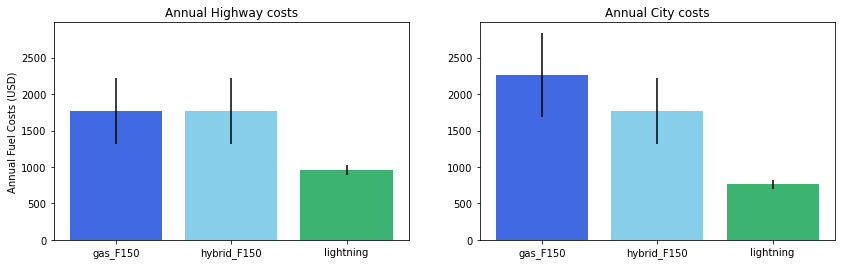

In [488]:
# Bar charts to compare the annual fuel costs for the selected trucks
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(14,4))
ax1.bar(x=cost_df.index, height=cost_df['mean_highway'], yerr=cost_df['std_highway'], 
        color=cost_df['color'])
ax1.set_title('Annual Highway costs')
ax1.set_ylabel('Annual Fuel Costs (USD)')
ax2.bar(x=cost_df.index, height=cost_df['mean_city'], yerr=cost_df['std_city'], 
        color=cost_df['color'])
ax2.set_title('Annual City costs')
ax2.yaxis.set_tick_params(which='both', labelbottom=True);
# plt.savefig('annual_costs.png')

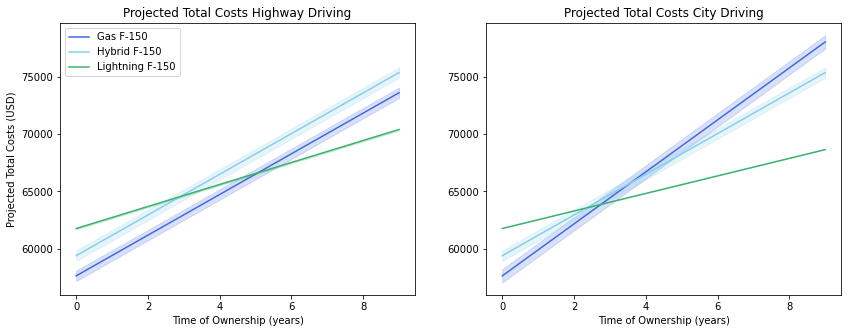

In [489]:
# Line plots to show the total costs of driving the selected trucks
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(14,5))
ax1.plot(cost_extrapolate.index, cost_extrapolate['gas_highway'], color='royalblue', 
         label='Gas F-150')
ax1.fill_between(cost_extrapolate.index, cost_extrapolate['gas_highway'] + cost_df['std_highway']['gas_F150'], 
                 cost_extrapolate['gas_highway'] - cost_df['std_highway']['gas_F150'], alpha=0.2, 
                color='royalblue')
ax1.plot(cost_extrapolate.index, cost_extrapolate['hybrid_highway'], color='skyblue', label='Hybrid F-150')
ax1.fill_between(cost_extrapolate.index, cost_extrapolate['hybrid_highway'] + cost_df['std_highway']['hybrid_F150'], 
                 cost_extrapolate['hybrid_highway'] - cost_df['std_highway']['hybrid_F150'], alpha=0.2, 
                color='skyblue')
ax1.plot(cost_extrapolate.index, cost_extrapolate['lightning_highway'], color='mediumseagreen', 
        label='Lightning F-150')
ax1.fill_between(cost_extrapolate.index, cost_extrapolate['lightning_highway'] + cost_df['std_highway']['lightning'], 
                 cost_extrapolate['lightning_highway'] - cost_df['std_highway']['lightning'], alpha=0.2, 
                color='mediumseagreen')
ax1.set_title('Projected Total Costs Highway Driving')
ax1.set_ylabel('Projected Total Costs (USD)')
ax1.set_xlabel('Time of Ownership (years)')
ax1.legend()

ax2.plot(cost_extrapolate.index, cost_extrapolate['gas_city'], color='royalblue')
ax2.fill_between(cost_extrapolate.index, cost_extrapolate['gas_city'] + cost_df['std_city']['gas_F150'], 
                 cost_extrapolate['gas_city'] - cost_df['std_city']['gas_F150'], alpha=0.2,
                color='royalblue')
ax2.plot(cost_extrapolate.index, cost_extrapolate['hybrid_city'], color='skyblue')
ax2.fill_between(cost_extrapolate.index, cost_extrapolate['hybrid_city'] + cost_df['std_city']['hybrid_F150'], 
                 cost_extrapolate['hybrid_city'] - cost_df['std_city']['hybrid_F150'], alpha=0.2,
                color='skyblue')
ax2.plot(cost_extrapolate.index, cost_extrapolate['lightning_city'], color='mediumseagreen')
ax2.fill_between(cost_extrapolate.index, cost_extrapolate['lightning_city'] + cost_df['std_city']['lightning'], 
                 cost_extrapolate['lightning_city'] - cost_df['std_city']['lightning'], alpha=0.2)
ax2.set_title('Projected Total Costs City Driving')
ax2.set_xlabel('Time of Ownership (years)')
ax2.yaxis.set_tick_params(which='both', labelbottom=True);
plt.savefig('total_costs.png')

In [357]:
md(f'''## Conclusions
Currently, electric vehicles generally have a higher MSRP than equivalent gas-powered vehicles. \
But they are also generally less expensive to own due to lower fuel costs and less \
maintenance (oil changes, etc.). This analysis shows that with only taking into account fuel costs, \
the overall cost of driving the standard 2022 Ford F-150 Lightning XLT would be less than the \
overall cost of driving the equivalent gas-powered 2022 Ford F-150 XLT in only \
**{city_EV_time_savings} to {highway_EV_time_savings} years** on average for 37 miles per day of city or highway \
driving, respectively based on the average fuel prices over the last 3 years. Fuel for the gas-powered \
2022 Ford F-150 XLT would cost **{highway_ev_gas_factor} to {city_ev_gas_factor} times** \
more than the electric 2022 Ford F-150 Lightning XLT. Fuel for the 2022 Ford F-150 Hybrid would cost \
**{highway_ev_hybrid_factor} to {city_ev_hybrid_factor} times** more than the 2022 Ford F-150 Lightning XLT. \
This is based on the EPA estimated fuel efficiency for \
these trucks, which due to various factors, can be different than what you might [experience]\
(https://www.fueleconomy.gov/feg/why_differ.shtml).

This analysis only takes into account fuel costs, there are other costs that will affect the overall cost\
of owning any vehicle. The [federal EV tax credit](https://www.fueleconomy.gov/feg/taxevb.shtml) \
of up to $7,500 for qualifying new EV purchases (the Ford F-150 Lightning still qualifies for \
the full amount), would make the EV version less than the gas-powered F-150 from the initial purchase. \
However, the cost of purchasing and installing an in-home level 2 charger could be \
several thousand dollars, which would increase the total cost of owning the EV version.

This analysis also did not take into account maintenace costs, which are generally higher in \
gas-powered vehicles than EVs, between [20]() and [50%](https://betterenergy.org/blog/consumer\
-reports-study-finds-electric-vehicle-maintenance-costs-are-50-less-than-gas-powered-cars/), \
again favoring EVs for lower overall cost of ownership. 

This analysis only gives an estimate of the total cost of ownership of these vehicles and is meant as \
a comparison among three similar trucks using typical driving distances and estimates of fuel efficiency \
and average fuel costs in the US. Actual costs of driving these vehicles will vary depending on driving \
style, fuel quality, where you drive, etc. 
''')

## Conclusions
Currently, electric vehicles generally have a higher MSRP than equivalent gas-powered vehicles. But they are also generally less expensive to own due to lower fuel costs and less maintenance (oil changes, etc.). This analysis shows that with only taking into account fuel costs, the overall cost of driving the standard 2022 Ford F-150 Lightning XLT would be less than the overall cost of driving the equivalent gas-powered 2022 Ford F-150 XLT in only **3 to 6 years** on average for 37 miles per day of city or highway driving, respectively based on the average fuel prices over the last 3 years. Fuel for the gas-powered 2022 Ford F-150 XLT would cost **1.8 to 3.0 times** more than the electric 2022 Ford F-150 Lightning XLT. Fuel for the 2022 Ford F-150 Hybrid would cost **1.8 to 2.3 times** more than the 2022 Ford F-150 Lightning XLT. This is based on the EPA estimated fuel efficiency for these trucks, which due to various factors, can be different than what you might [experience](https://www.fueleconomy.gov/feg/why_differ.shtml).

This analysis only takes into account fuel costs, there are other costs that will affect the overall costof owning any vehicle. The [federal EV tax credit](https://www.fueleconomy.gov/feg/taxevb.shtml) of up to $7,500 for qualifying new EV purchases (the Ford F-150 Lightning still qualifies for the full amount), would make the EV version less than the gas-powered F-150 from the initial purchase. However, the cost of purchasing and installing an in-home level 2 charger could be several thousand dollars, which would increase the total cost of owning the EV version.

This analysis also did not take into account maintenace costs, which are generally higher in gas-powered vehicles than EVs, between [20]() and [50%](https://betterenergy.org/blog/consumer-reports-study-finds-electric-vehicle-maintenance-costs-are-50-less-than-gas-powered-cars/), again favoring EVs for lower overall cost of ownership. 

This analysis only gives an estimate of the total cost of ownership of these vehicles and is meant as a comparison among three similar trucks using typical driving distances and estimates of fuel efficiency and average fuel costs in the US. Actual costs of driving these vehicles will vary depending on driving style, fuel quality, where you drive, etc. 
